In [5]:
# Import libraries
import pandas as pd
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import math
import powerlaw
import random
from collections import defaultdict

In [6]:
# Load the dataset
file_path = "/home/tim/Desktop/Desktop/DELFT/APPLIED PHYSICS - MASTER/Modeling and Data Analysis in Complex Networks/ASSIGNMENTS/ASSIGNMENT 1/SFHH2025.xlsx"
df = pd.read_excel(file_path, sheet_name="Sheet1")

In [7]:
# Create an undirected graph
G = nx.Graph()

# Create nodes and edges
for index, row in df.iterrows():
    G.add_edge(row['id1'], row['id2'], time_step=row['time_step'])

In [8]:
# Load the temporal network data
# Assuming Gdata is a list of tuples (time, node_i, node_j)
Gdata = df[['id1', 'id2', 'time_step']].values.tolist()

# Parameters
N = G.number_of_nodes()  # Number of nodes
T = 3493  # Last time step

def simulate_spreading(seed, Gdata, T):
    infected = set([seed])
    I_t = np.zeros(T + 1)
    I_t[0] = 1  # Seed is infected at t=0

    contacts = defaultdict(list)
    for node_i, node_j, time in Gdata:
        contacts[time].append((node_i, node_j))

    for t in range(1, T + 1):
        new_infected = set()
        for node_i, node_j in contacts[t]:
            if node_i in infected and node_j not in infected:
                new_infected.add(node_j)
            elif node_j in infected and node_i not in infected:
                new_infected.add(node_i)
        infected.update(new_infected)
        I_t[t] = len(infected)

    return I_t

# Run simulations
all_I_t = np.zeros((N, T + 1))
for seed in range(N):
    all_I_t[seed] = simulate_spreading(seed, Gdata, T)

# Calculate average and standard deviation
E_I_t = np.mean(all_I_t, axis=0)
Var_I_t = np.std(all_I_t, axis=0)

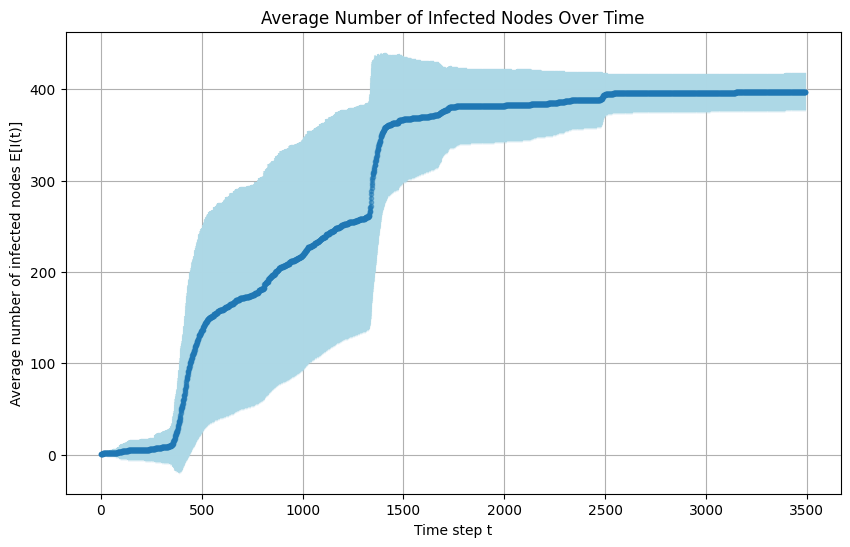

In [9]:
# Plot the results
plt.figure(figsize=(10, 6))
plt.errorbar(range(T + 1), E_I_t, yerr=Var_I_t, fmt='.-', ecolor='lightblue', alpha=0.5, capsize=0.1)
plt.xlabel('Time step t')
plt.ylabel('Average number of infected nodes E[I(t)]')
plt.title('Average Number of Infected Nodes Over Time')
plt.grid(True)
plt.show()

In [ ]:
# Load the temporal network data
# Assuming Gdata is a list of tuples (time, node_i, node_j)
Gdata = df[['id1', 'id2', 'time_step']].values.tolist()

# Parameters
N = G.number_of_nodes()  # Number of nodes
T = 3493  # Last time step

def simulate_spreading(seed, Gdata, T):
    infected = set([seed])
    I_t = np.zeros(T + 1)
    I_t[0] = 1  # Seed is infected at t=0

    contacts = defaultdict(list)
    for node_i, node_j, time in Gdata:
        contacts[time].append((node_i, node_j))

    for t in range(1, T + 1):
        new_infected = set()
        for node_i, node_j in contacts[t]:
            if node_i in infected and node_j not in infected:
                new_infected.add(node_j)
            elif node_j in infected and node_i not in infected:
                new_infected.add(node_i)
        infected.update(new_infected)
        I_t[t] = len(infected)

    return I_t

# Run simulations
all_I_t = np.zeros((N, T + 1))
for seed in range(N):
    all_I_t[seed] = simulate_spreading(seed, Gdata, T)

# Calculate average and standard deviation
E_I_t = np.mean(all_I_t, axis=0)
Var_I_t = np.std(all_I_t, axis=0)

#Calculate the sorted influence times R
threshold = 0.8 * N  # 80% threshold

influence_times = {}  # node -> time to infect at least 80% of nodes

for node in range(N):
    crossing_time = T + 1  # default if node never infects 80%
    for t in range(T + 1):
        if all_I_t[node][t] >= threshold:
            crossing_time = t
            break
    influence_times[node] = crossing_time

# Now 'influence_time' holds the earliest time each seed infects >=80% of the network.
# Next, sort the dictionary by time value:
sorted_influence_times = sorted(influence_times.items(), key=lambda x: x[1])

print("Influence times (node -> time to infect 80%):")
for node, t_val in sorted_influence_times:
    print(f"Node {node}: {t_val}")

Influence times (node -> time to infect 80%):
Node 1: 1070
Node 2: 1070
Node 5: 1070
Node 6: 1070
Node 7: 1070
Node 8: 1070
Node 9: 1070
Node 10: 1070
Node 11: 1070
Node 12: 1070
Node 13: 1070
Node 14: 1070
Node 15: 1070
Node 16: 1070
Node 17: 1070
Node 18: 1070
Node 19: 1070
Node 20: 1070
Node 21: 1070
Node 22: 1070
Node 23: 1070
Node 24: 1070
Node 25: 1070
Node 26: 1070
Node 27: 1070
Node 29: 1070
Node 30: 1070
Node 33: 1070
Node 34: 1070
Node 35: 1070
Node 39: 1070
Node 41: 1070
Node 42: 1070
Node 43: 1070
Node 44: 1070
Node 45: 1070
Node 46: 1070
Node 47: 1070
Node 48: 1070
Node 51: 1070
Node 52: 1070
Node 53: 1070
Node 54: 1070
Node 56: 1070
Node 57: 1070
Node 58: 1070
Node 59: 1070
Node 60: 1070
Node 64: 1070
Node 65: 1070
Node 68: 1070
Node 37: 1084
Node 38: 1084
Node 40: 1084
Node 55: 1084
Node 61: 1084
Node 69: 1084
Node 70: 1084
Node 71: 1084
Node 72: 1084
Node 73: 1084
Node 74: 1084
Node 75: 1084
Node 76: 1084
Node 80: 1084
Node 95: 1084
Node 66: 1086
Node 67: 1086
Node 77: 

In [20]:
# Add weights to the edges corresponding to the total number of contacts between the corresponding two nodes
contacts = df.groupby(['id1', 'id2']).size().reset_index(name='contacts')

# Add the weights to the edges
for index, row in contacts.iterrows():
    G[row['id1']][row['id2']]['weight'] = row['contacts']

In [21]:
# Compute the degree of each node
degree_dict = dict(G.degree())

# Compute the strength of each node using the weight attribute
strength_dict = {}
for node in G.nodes:
    strength_dict[node] = sum(data['weight'] for _, _, data in G.edges(node, data=True))

# Rank the nodes by degree
ranked_by_degree = sorted(degree_dict.items(), key=lambda x: x[1], reverse=True)

# Rank the nodes by strength
ranked_by_strength = sorted(strength_dict.items(), key=lambda x: x[1], reverse=True)

# Print the top 10 nodes by degree and strength
verbose = False
if verbose:
    print("Top 10 nodes by degree:")
    for node, degree in ranked_by_degree[:10]:
        print(f"Node {node}: Degree {degree}")

    print("\nTop 10 nodes by strength:")
    for node, strength in ranked_by_strength[:10]:
        print(f"Node {node}: Strength {strength}")

In [23]:
# 1) Define or load your graph G and compute all_I_t beforehand:
#    (Assumes you've already got N, T, all_I_t, etc.)

# 2) Compute the influence_times dictionary:
threshold = 0.8 * N  # 80% threshold
influence_times = {}  # node -> time to infect at least 80% of nodes

for node in range(N):
    crossing_time = T + 1  # default if node never infects 80%
    for t in range(T + 1):
        if all_I_t[node][t] >= threshold:
            crossing_time = t
            break
    influence_times[node] = crossing_time

# Sort by the time value and store as sorted_influence_times
sorted_influence_times = sorted(influence_times.items(), key=lambda x: x[1])

# 3) Also assume you have degree_dict, strength_dict, etc., and have
#    ranked_by_degree = sorted(degree_dict.items(), key=..., reverse=True)
#    ranked_by_strength = sorted(strength_dict.items(), key=..., reverse=True)

def calculate_recognition_rates(f, iterations=1000):
    """Computes r_RD(f) and r_RS(f) over multiple random tie-break iterations."""
    num_top_nodes = int(f * len(G.nodes))

    r_RD_f_degree_total = 0
    r_RS_f_strength_total = 0

    for _ in range(iterations):
        # Top f nodes by influence, degree, and strength
        top_f_influence_nodes = [node for node, _ in sorted_influence_times[:num_top_nodes]]
        top_f_degree_nodes = [node for node, _ in ranked_by_degree[:num_top_nodes]]
        top_f_strength_nodes = [node for node, _ in ranked_by_strength[:num_top_nodes]]

        def handle_ties(top_nodes, sorted_nodes, metric_dict):
            """Resolves ties at the boundary by randomly choosing among tied nodes."""
            last_value = sorted_nodes[num_top_nodes - 1][1]
            tied_nodes = [n for n, val in sorted_nodes if val == last_value]

            selected_tied_nodes = [n for n in top_nodes if metric_dict[n] == last_value]
            other_nodes = [n for n in top_nodes if metric_dict[n] != last_value]

            if len(selected_tied_nodes) < len(tied_nodes):
                # We only fill as many 'tied' slots as required
                remaining_slots = len(selected_tied_nodes)
                additional_nodes = np.random.choice(tied_nodes, remaining_slots, replace=False).tolist()
                top_nodes = other_nodes + additional_nodes

            return top_nodes

        # Resolve ties for each ranking
        top_f_influence_nodes = handle_ties(top_f_influence_nodes, sorted_influence_times, influence_times)
        top_f_degree_nodes = handle_ties(top_f_degree_nodes, ranked_by_degree, degree_dict)
        top_f_strength_nodes = handle_ties(top_f_strength_nodes, ranked_by_strength, strength_dict)

        # Calculate the intersection
        intersection_nodes_degree = set(top_f_influence_nodes).intersection(top_f_degree_nodes)
        intersection_nodes_strength = set(top_f_influence_nodes).intersection(top_f_strength_nodes)

        r_RD_f_degree_total += len(intersection_nodes_degree) / num_top_nodes
        r_RS_f_strength_total += len(intersection_nodes_strength) / num_top_nodes

    r_RD_f_degree = r_RD_f_degree_total / iterations
    r_RS_f_strength = r_RS_f_strength_total / iterations
    return r_RD_f_degree, r_RS_f_strength

# 4) Now define f_values and capture results
f_values = [i/100 for i in range(5, 51, 5)]
recognition_rates = {'f': [], 'r_RD_f_degree': [], 'r_RS_f_strength': []}

for f in f_values:
    r_RD_f_degree, r_RS_f_strength = calculate_recognition_rates(f)
    recognition_rates['f'].append(f)
    recognition_rates['r_RD_f_degree'].append(r_RD_f_degree)
    recognition_rates['r_RS_f_strength'].append(r_RS_f_strength)
    
verbose = False
if verbose:
    df_recognition_rates = pd.DataFrame(recognition_rates)
    print(df_recognition_rates)